In [63]:
# Dependencies
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import requests
from config import crimekey
from config import censuskey
from pprint import pprint
from census import Census
import scipy.stats as st

# API Setup
baseurl = "http://api.usa.gov/crime/fbi/sapi/"
c = Census(censuskey, year=2019)

In [2]:
URL = ("https://api.usa.gov/crime/fbi/sapi/api/summarized/state/AL/violent-crime/2019/2019?API_KEY=" + crimekey)

getdatasets = requests.get(URL)
datasets_json = getdatasets.json()
# pprint(datasets_json)

{'pagination': {'count': 352, 'page': 0, 'pages': 18, 'per_page': 20},
 'results': [{'actual': 209,
              'cleared': 62,
              'data_range': None,
              'data_year': 2019,
              'offense': 'violent-crime',
              'ori': 'AL0010000',
              'state_abbr': 'AL'},
             {'actual': 383,
              'cleared': 3,
              'data_range': None,
              'data_year': 2019,
              'offense': 'violent-crime',
              'ori': 'AL0010100',
              'state_abbr': 'AL'},
             {'actual': 0,
              'cleared': 0,
              'data_range': None,
              'data_year': 2019,
              'offense': 'violent-crime',
              'ori': 'AL0010300',
              'state_abbr': 'AL'},
             {'actual': 122,
              'cleared': 18,
              'data_range': None,
              'data_year': 2019,
              'offense': 'violent-crime',
              'ori': 'AL0010400',
              'state_abb

In [6]:
# Find crime rate for each state
stateAbbs = ['AL', 'AK', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS',
            'KY', 'LA', 'MA', 'ME', 'MD', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM', 'NV', 
            'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VA', 'VT', 'WA', 'WI', 'WV', 'WY']
statedict = {}
record = 1

# loop through all states and pull data for each
for item in stateAbbs:
    query_url = "https://api.usa.gov/crime/fbi/sapi/api/summarized/state/" + item + "/violent-crime/2019/2019?API_KEY=" + crimekey
    # Get response into JSON
    stateresponse = requests.get(query_url)
    statejson = stateresponse.json()
    x = len(statejson['results'])
    # Log each state and account for exceptions
    try:
        # Collect crime data and put it into a dictionary
        actuals = 0
        for i in range(x):
            actuals = actuals + statejson['results'][i]['actual']
            statedict[item] = [actuals]
        print(f"Processing record {record} | {item}")
        record += 1
        
            
    # Exception if state data isn't found
    except:
        print(f"Data not found for {item}. Skipping...")

print("----------Job complete!----------")
    

Processing record 1 | AL
Processing record 2 | AK
Processing record 3 | AR
Processing record 4 | AZ
Processing record 5 | CA
Processing record 6 | CO
Processing record 7 | CT
Processing record 8 | DE
Processing record 9 | DC
Processing record 10 | FL
Processing record 11 | GA
Processing record 12 | HI
Processing record 13 | ID
Processing record 14 | IL
Processing record 15 | IN
Processing record 16 | IA
Processing record 17 | KS
Processing record 18 | KY
Processing record 19 | LA
Processing record 20 | MA
Processing record 21 | ME
Processing record 22 | MD
Processing record 23 | MI
Processing record 24 | MN
Processing record 25 | MO
Processing record 26 | MS
Processing record 27 | MT
Processing record 28 | NC
Processing record 29 | ND
Processing record 30 | NE
Processing record 31 | NH
Processing record 32 | NJ
Processing record 33 | NM
Processing record 34 | NV
Processing record 35 | NY
Processing record 36 | OH
Processing record 37 | OK
Processing record 38 | OR
Processing record 39 

In [10]:
# Convert the dictionary into a dataframe
statedf = pd.DataFrame.from_dict(statedict, orient='index')
statedf

,0
AL,1208
AK,4742
AR,1069
AZ,3379
CA,9734
CO,5198
CT,1293
DE,1417
DC,7403
FL,2662


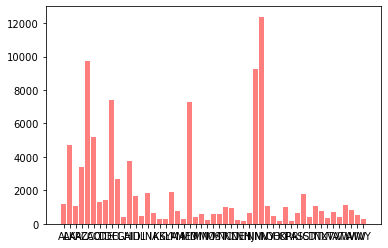

<Figure size 288x7200 with 0 Axes>

In [34]:
plt.bar(stateAbbs, statedf[0], color='r', alpha=0.5, align="center")
plt.figure(figsize=(4,100))
plt.show()

In [46]:
# Merge state names and abbreviations to match to Census data

stateNames = {
  "AL" : "Alabama",
  "AK" : "Alaska",
  "AZ" : "Arizona",
  "AR" : "Arkansas",
  "CA" : "California",
  "CO" : "Colorado",
  "CT" : "Connecticut",
  "DE" : "Delaware",
  "FL" : "Florida",
  "GA" : "Georgia",
  "HI" : "Hawaii",
  "ID" : "Idaho",
  "IL" : "Illinois",
  "IN" : "Indiana",
  "IA" : "Iowa",
  "KS" : "Kansas",
  "KY" : "Kentucky",
  "LA" : "Louisiana",
  "ME" : "Maine",
  "MD" : "Maryland",
  "MA" : "Massachusetts",
  "MI" : "Michigan",
  "MN" : "Minnesota",
  "MS" : "Mississippi",
  "MO" : "Missouri",
  "MT" : "Montana",
  "NE" : "Nebraska",
  "NV" : "Nevada",
  "NH" : "New Hampshire",
  "NJ" : "New Jersey",
  "NM" : "New Mexico",
  "NY" : "New York",
  "NC" : "North Carolina",
  "ND" : "North Dakota",
  "OH" : "Ohio",
  "OK" : "Oklahoma",
  "OR" : "Oregon",
  "PA" : "Pennsylvania",
  "RI" : "Rhode Island",
  "SC" : "South Carolina",
  "SD" : "South Dakota",
  "TN" : "Tennessee",
  "TX" : "Texas",
  "UT" : "Utah",
  "VT" : "Vermont",
  "VA" : "Virginia",
  "WA" : "Washington",
  "WV" : "West Virginia",
  "WI" : "Wisconsin",
  "WY" : "Wyoming",
  "DC" : "District of Columbia"
}

stateNamedf = pd.DataFrame.from_dict(stateNames, orient='index')

# Merge the datasets using the sate columns
statemerge = pd.merge(statedf, stateNamedf, left_index=True, right_index=True)
statemerge.rename(columns={'0_x': 'Actuals', '0_y': 'Name'}, inplace=True)
statemerge

,Actuals,Name
AL,1208,Alabama
AK,4742,Alaska
AR,1069,Arkansas
AZ,3379,Arizona
CA,9734,California
CO,5198,Colorado
CT,1293,Connecticut
DE,1417,Delaware
DC,7403,District of Columbia
FL,2662,Florida


In [35]:
# Run Census Search to retrieve data on all states
# Note the addition of "B23025_005E" for unemployment count
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_005E"), {'for': 'state:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_005E": "Unemployment Count",
                                      "NAME": "Name", "state": "State"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Add in Employment Rate (Employment Count / Population)
census_pd["Unemployment Rate"] = 100 * \
    census_pd["Unemployment Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["State", "Name", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Poverty Rate", "Unemployment Rate"]]

census_pd.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate
0,01,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946
1,02,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114
2,04,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676
3,05,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860
4,06,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765


In [53]:
# Merge crime data with Census data
alldata = pd.merge(census_pd, statemerge, how="left", on="Name")
alldata.head()

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Actuals
0,01,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946,1208.0
1,02,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114,4742.0
2,04,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676,3379.0
3,05,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860,1069.0
4,06,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765,9734.0


In [49]:
# Calculate crime rate percentage by dividing actuals by population
alldata["Crime Rate"] = alldata["Actuals"] / alldata["Population"] * 100
alldata

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Actuals,Crime Rate
0,01,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946,1208.0,0.024773
1,02,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114,4742.0,0.643360
2,04,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676,3379.0,0.047927
3,05,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860,1069.0,0.035641
4,06,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765,9734.0,0.024779
5,08,Colorado,5610349.0,36.7,72331.0,38226.0,565873.0,10.086235,2.341583,5198.0,0.092650
6,10,Delaware,957248.0,40.6,68287.0,35450.0,109400.0,11.428595,2.766368,1417.0,0.148029
7,11,District of Columbia,692683.0,34.0,86420.0,56147.0,107140.0,15.467393,4.037489,7403.0,1.068743
8,09,Connecticut,3575074.0,41.0,78444.0,44496.0,344146.0,9.626262,3.257443,1293.0,0.036167
9,12,Florida,20901636.0,42.0,55660.0,31619.0,2870487.0,13.733313,2.686144,2662.0,0.012736


In [52]:
# Puerto Rico has no crime data. Drop this row.
cleandata = alldata.dropna(how='any')
cleandata

,State,Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Actuals,Crime Rate
0,01,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946,1208.0,0.024773
1,02,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114,4742.0,0.643360
2,04,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676,3379.0,0.047927
3,05,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860,1069.0,0.035641
4,06,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765,9734.0,0.024779
5,08,Colorado,5610349.0,36.7,72331.0,38226.0,565873.0,10.086235,2.341583,5198.0,0.092650
6,10,Delaware,957248.0,40.6,68287.0,35450.0,109400.0,11.428595,2.766368,1417.0,0.148029
7,11,District of Columbia,692683.0,34.0,86420.0,56147.0,107140.0,15.467393,4.037489,7403.0,1.068743
8,09,Connecticut,3575074.0,41.0,78444.0,44496.0,344146.0,9.626262,3.257443,1293.0,0.036167
9,12,Florida,20901636.0,42.0,55660.0,31619.0,2870487.0,13.733313,2.686144,2662.0,0.012736


In [55]:
# Rename columns to better describe the data
cleandata.rename(columns={'Name': 'State Name', 'Actuals': 'Violent Crime Count'}, inplace=True)
cleandata.head()

,State,State Name,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Poverty Rate,Unemployment Rate,Violent Crime Count,Crime Rate
0,01,Alabama,4876250.0,39.0,50536.0,27928.0,795989.0,16.323794,2.708946,1208.0,0.024773
1,02,Alaska,737068.0,34.3,77640.0,36787.0,76933.0,10.437707,3.637114,4742.0,0.643360
2,04,Arizona,7050299.0,37.7,58945.0,30694.0,1043764.0,14.804535,2.778676,3379.0,0.047927
3,05,Arkansas,2999370.0,38.1,47597.0,26577.0,496260.0,16.545475,2.349860,1069.0,0.035641
4,06,California,39283497.0,36.5,75235.0,36955.0,5149742.0,13.109174,3.052765,9734.0,0.024779


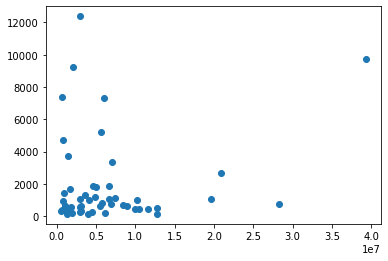

In [56]:
plt.scatter(cleandata['Population'],cleandata['Violent Crime Count'])


In [57]:
print(cleandata['Population'].max())

39283497.0


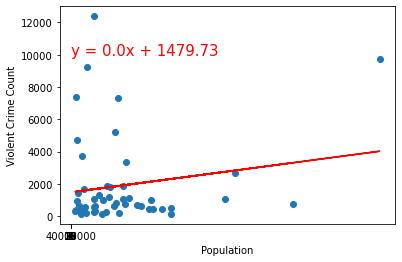

In [71]:
# Add the linear regression equation and line to plot
x_values = cleandata['Population']
y_values = cleandata['Violent Crime Count']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(1000,10000),fontsize=15,color="red")
plt.xlabel('Population')
plt.ylabel('Violent Crime Count')
x = [0, 5, 10, 15, 20, 25, 30, 35, 40000000]
default_x_ticks = range(len(x))
plt.xticks(default_x_ticks, x)
plt.show()